<a href="https://colab.research.google.com/github/MariamAmmar/6644_Final_Project/blob/main/MasterData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

# Import the numpy and pandas package

from google.colab import drive
from google.colab import files

drive.mount('/content/drive')
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#Import tables and merge to create master table


# price = pd.read_csv('drive/MyDrive/6644/price_fact.csv')
# site = pd.read_csv('drive/MyDrive/6644/site_dim.csv')


price = pd.read_csv('price_fact.csv')
site = pd.read_csv('site_dim.csv')



# url1 = '/MyDrive/6644/price_fact.csv'

# url2 = '6644/site_dim.csv'
# site = pd.read_csv(url2)

# site.rename(columns={'site_number': 'site_id'}, inplace=True)

# merged_data = pd.merge(price, site, on='site_id')



In [26]:
##Create master DF to be used by everyone
#Start by8 merging dataframes and dropping unneeded columns

#new_df = pd.read_csv('new_df.csv')

price['fiscal_week_end_date'] = pd.to_datetime(price['fiscal_week_end_date'])


merged_data = pd.merge(price, site, on='site_number',how = "left").dropna()

merged_data['fiscal_week_end_date'] = pd.to_datetime(merged_data['fiscal_week_end_date'])

# Define the number of samples to take from each group
num_samples = 5000  # Change this value as needed

merged_data.head()



,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,dist_nearest_act_site,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name
0,2700549,2023-03-26,957.76,409,2.34,332.84,0.35,0.81,1.53,2356.04,...,1.788907,Rural,6337.171670,0.174539,2131155.197,56134.302891,0.022560,3120,Arizona,GRAND CANYON
2,2703490,2023-03-26,2500.10,1042,2.40,911.39,0.36,0.87,1.52,5900.57,...,1.487683,Urban,295774.019578,1.900653,3837820.766,90051.865921,1.060779,3140,Arizona,GRAND CANYON
4,2707486,2023-03-26,2307.25,919,2.51,923.55,0.40,1.00,1.51,5671.21,...,3.161092,Rural,81865.558840,0.159541,2806969.192,50146.921852,0.015516,1410,Florida,FLORIDA
5,2707739,2023-03-26,2422.12,900,2.69,1001.83,0.41,1.11,1.58,5537.80,...,5.060805,Rural,24216.357043,0.105776,2397789.145,53414.465146,1.366684,1980,Alabama,GULF COAST
7,2709892,2023-03-26,1486.83,588,2.53,593.53,0.40,1.01,1.52,4178.26,...,0.495413,Urban,202002.358729,0.126933,1963178.295,112491.677427,3.342988,1880,Colorado,ROCKY MOUNTAINS


In [27]:
merged_data.columns

Index(['site_number', 'fiscal_week_end_date', 'item_sales', 'units_sold',
       'unit_price', 'gross_margin', 'margin_rate', 'net_single_unit_margin',
       'net_single_unit_cost', 'total_basket_sales', 'total_basket_units',
       'num_transactions', 'avg_basket', 'units_per_basket', 'store_size',
       'market_share', 'car_traffic', 'seconds_to_near_highway',
       'dist_nearest_act_site', 'Final_urbanicity', 'Pop_Estimate_CrYr',
       'dist_nearest_grocery', 'Total_merch_revenue_2022',
       'Median_HH_Income_CrYr', 'closest_tier1_competitor', 'Region_ID',
       'site_state_desc', 'BU_simplified_name'],
      dtype='object')

<ipython-input-28-e5f30ef7c1a8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


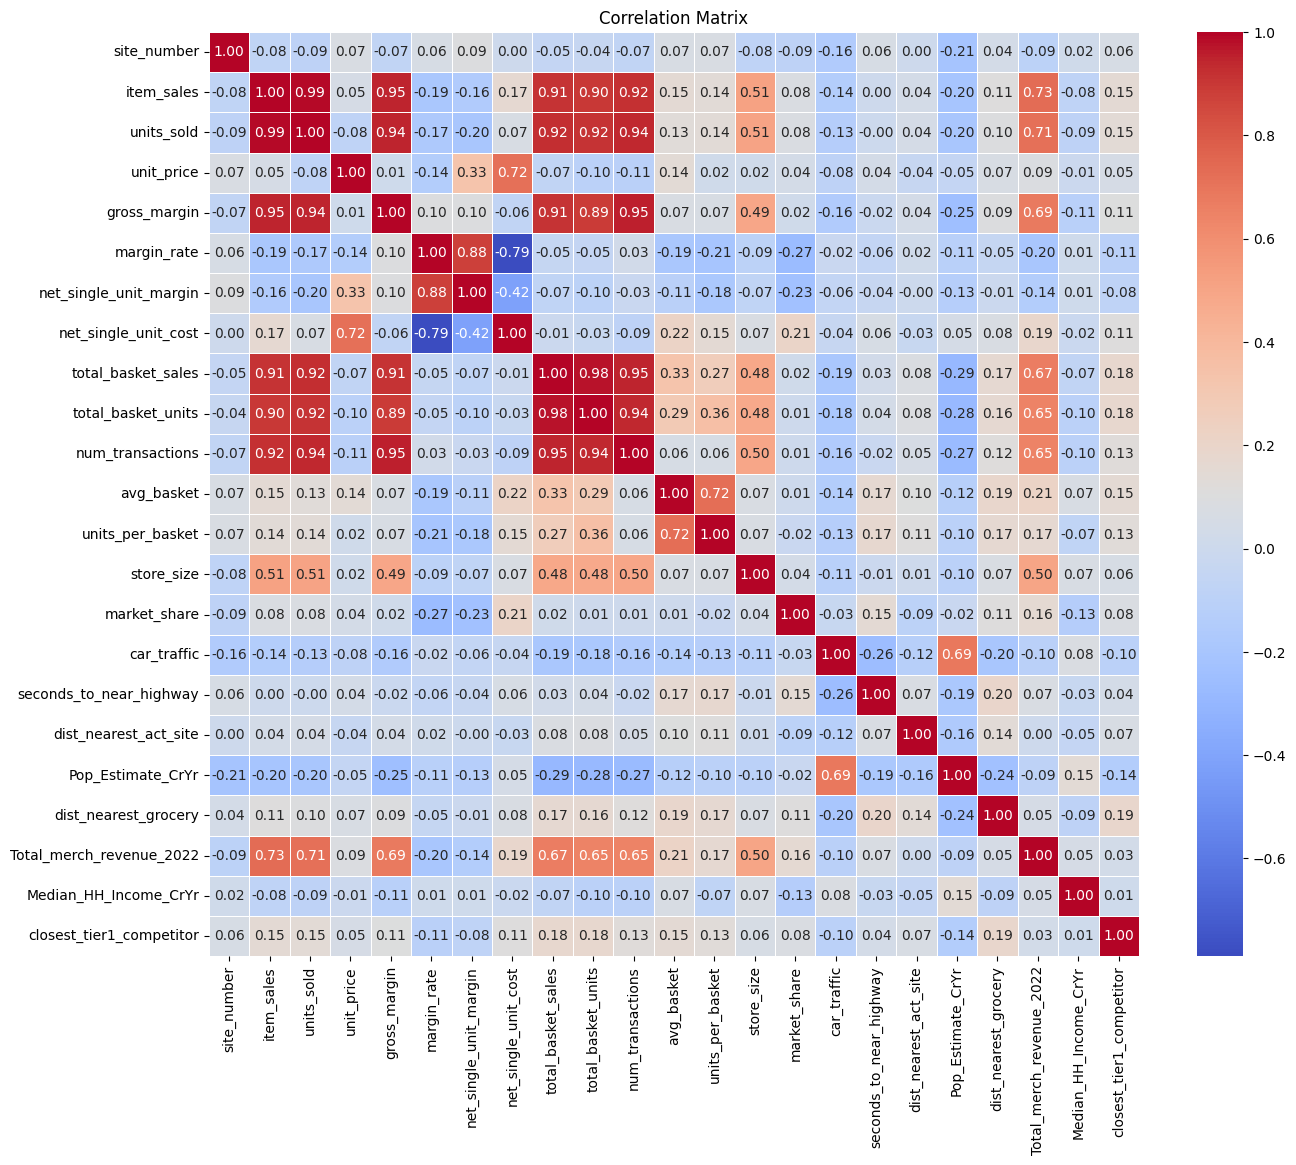

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

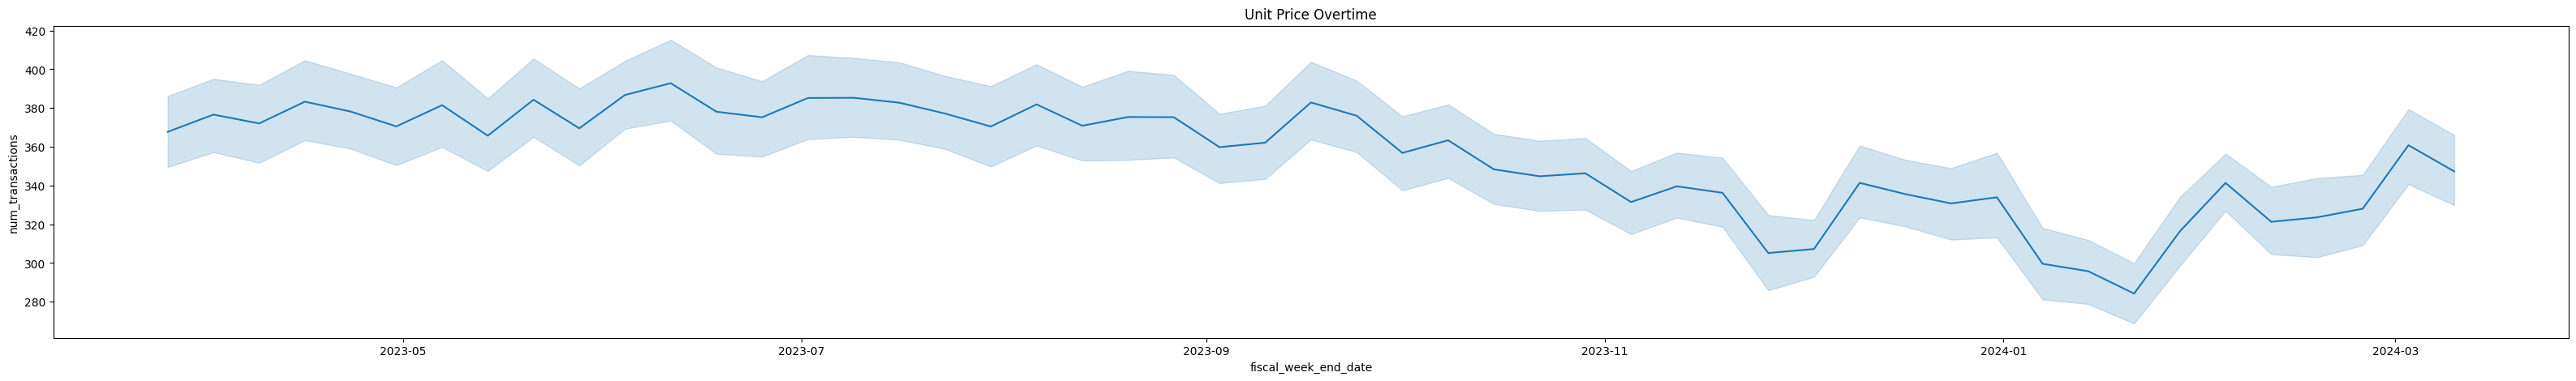

In [30]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='num_transactions')
plt.title('Unit Price Overtime')
plt.show()

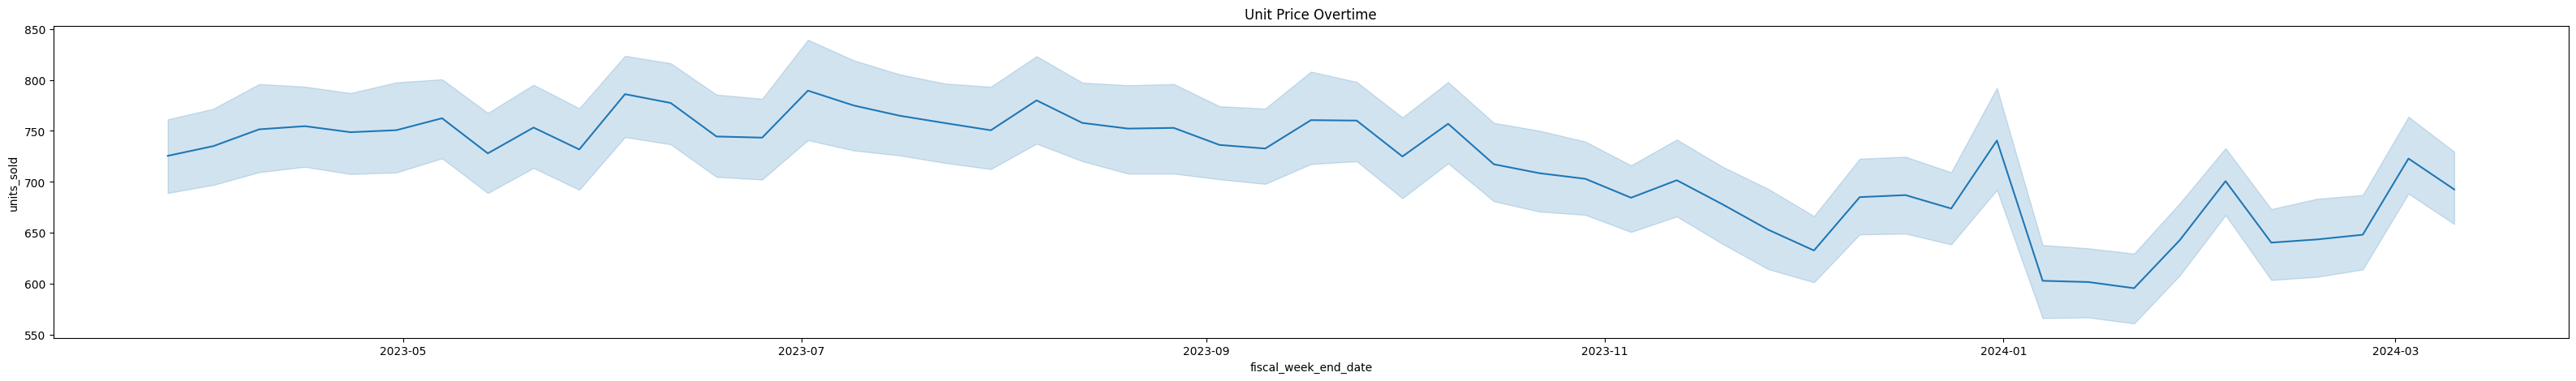

In [32]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='units_sold')
plt.title('Unit Price Overtime')
plt.show()

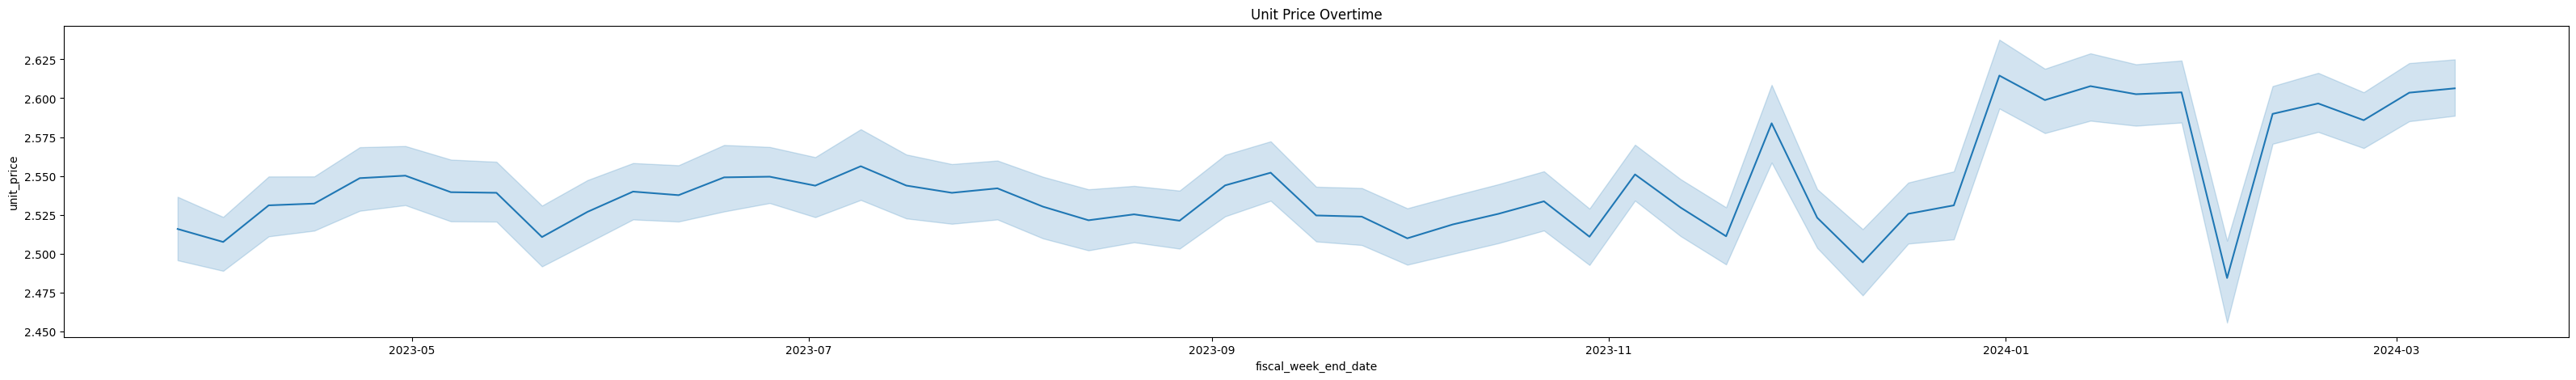

In [33]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='unit_price')
plt.title('Unit Price Overtime')
plt.show()

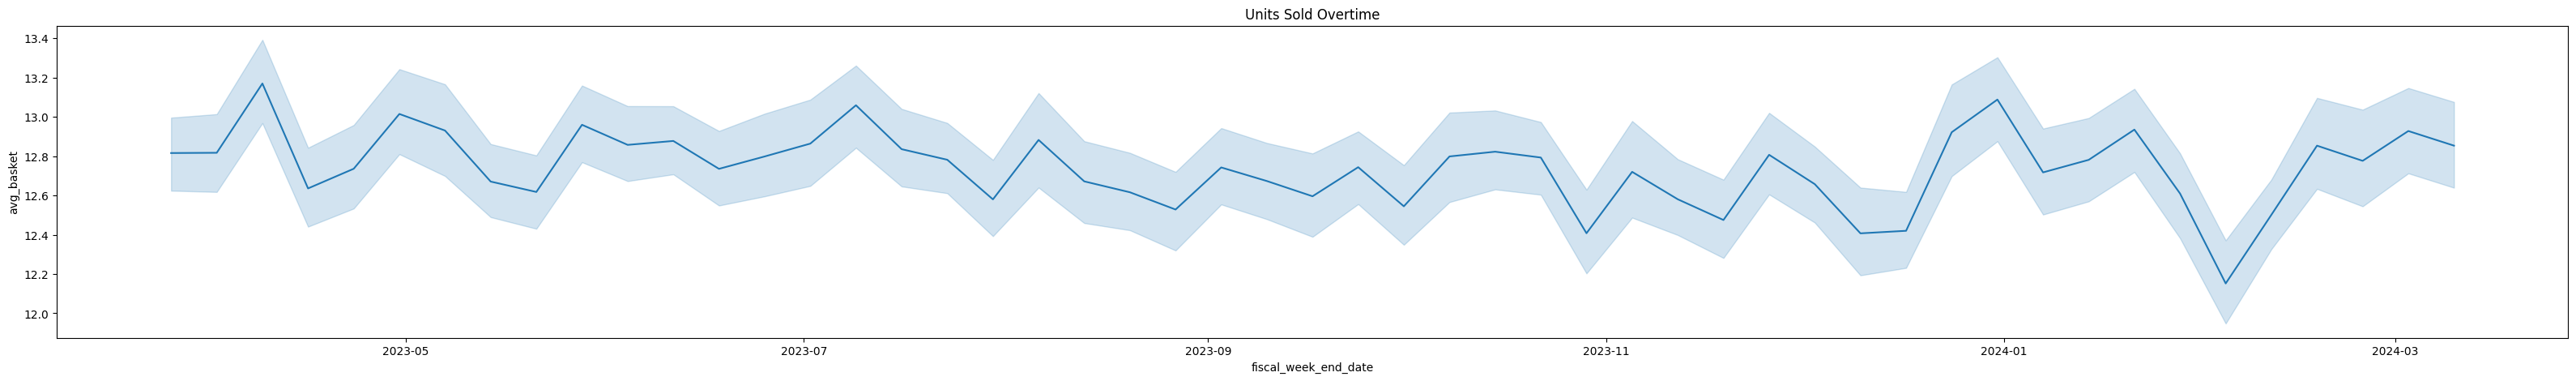

In [34]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='avg_basket')
plt.title('Units Sold Overtime')
plt.show()



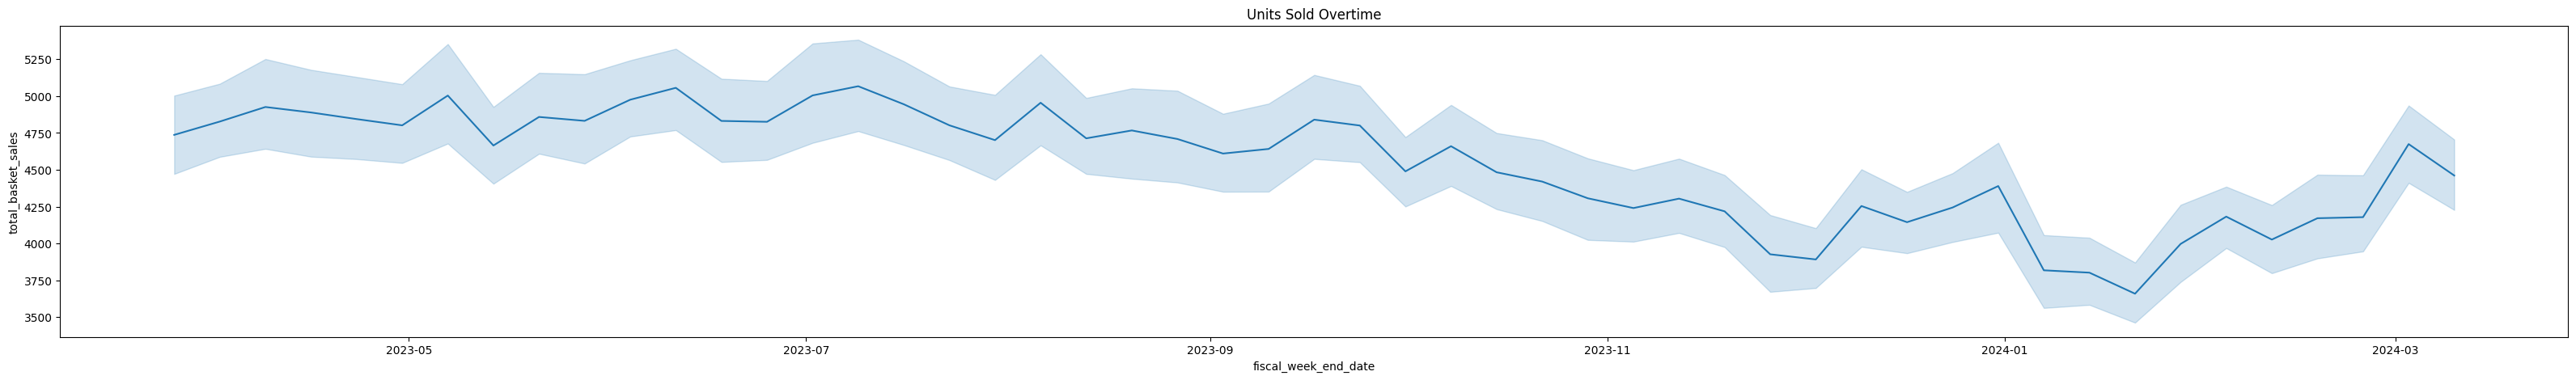

In [38]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='total_basket_sales')
plt.title('Units Sold Overtime')
plt.show()


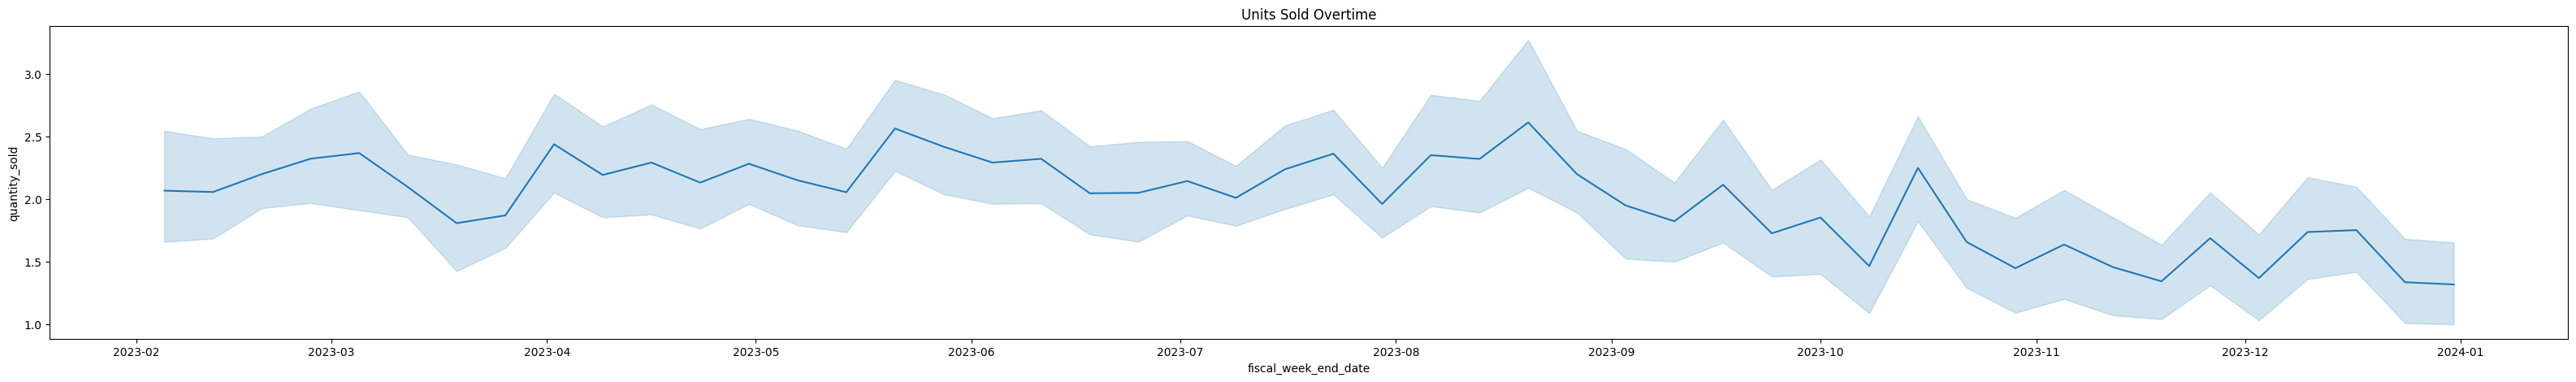

In [ ]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=new_df, x='fiscal_week_end_date', y='quantity_sold')
plt.title('Units Sold Overtime')
plt.show()


In [ ]:
merged_data.shape[0]

160441

In [ ]:
result = merged_data.groupby('fiscal_week_end_date').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)


                      units_sold   item_sales
fiscal_week_end_date                         
2023-02-05                 65970    137210.34
2023-02-12                116627    244978.66
2023-02-19                116114    244231.17
2023-02-26                117957    250237.58
2023-03-05                118456    245407.34
2023-03-12                118196    235193.15
2023-03-19                114299    230986.12
2023-03-26                112372    227978.01
2023-04-02                112416    230504.36
2023-04-09                115417    239017.99
2023-04-16                116457    245285.43
2023-04-23                127749    268084.60
2023-04-30                140047    293829.74
2023-05-07                179911    377714.90
2023-05-14                193222    404253.83
2023-05-21                193134    411914.75
2023-05-28                196701    420064.64
2023-06-04                187674    404356.06
2023-06-11                187752    406781.82
2023-06-18                182841  

In [ ]:
result = price.groupby('fiscal_week_end_date').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)


                      units_sold   item_sales
fiscal_week_end_date                         
2023-02-05                137956    298844.12
2023-02-12                235380    511634.84
2023-02-19                238284    517833.43
2023-02-26                247171    540816.81
2023-03-05                243557    522587.28
2023-03-12                242094    499606.64
2023-03-19                233053    486935.63
2023-03-26                233229    488401.92
2023-04-02                236580    498671.28
2023-04-09                236442    504887.41
2023-04-16                233091    506542.48
2023-04-23                272616    596018.31
2023-04-30                301102    658803.70
2023-05-07                371054    805471.46
2023-05-14                401664    863408.26
2023-05-21                434083    946151.62
2023-05-28                438668    956668.80
2023-06-04                424396    930696.47
2023-06-11                423254    932809.38
2023-06-18                416773  

In [ ]:
result = price.groupby('').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)

<Axes: xlabel='fiscal_week_end_date', ylabel='quantity_sold'>

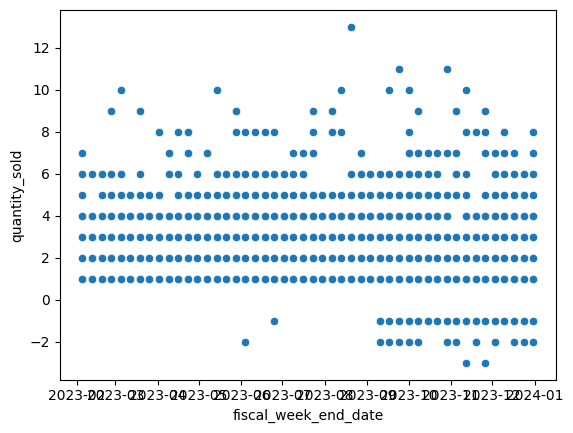

In [ ]:
sns.scatterplot(data=new_df, x='fiscal_week_end_date', y='quantity_sold')


In [ ]:
new_df.columns

Index(['division_desc', 'product_key', 'Region', 'site_number_corporate',
       'business_date', '1_product_key_org', 'sales_amount', 'quantity_sold',
       'site_address', 'site_city', 'site_zip', 'site_state_id',
       'gps_latitude', 'gps_longitude', 'region_desc', 'margin_rate',
       'unit_cost', 'unit_cost_actual', 'final_cost', 'margin',
       '2_product_key_cons', 'environment_name', 'item_number', 'upc',
       'sell_unit_qty', 'package_desc', 'size_unit_of_measure',
       'private_brand_desc', 'department_desc', 'category_desc',
       'sub_category_desc', 'brand_desc', 'manufacturer_desc', 'item_desc',
       'item_key', 'fiscal_week_key', 'fiscal_period_key', 'fiscal_week',
       'fiscal_week_number', 'fiscal_week_name', 'fiscal_week_name_fr',
       'fiscal_week_start_date', 'fiscal_week_end_date',
       'fiscal_week_number_in_per', 'fiscal_week_count_in_per',
       'labor_pay_week_start_date', 'labor_pay_week_end_date',
       'fiscal_week_rank', 'current_fiscal_

In [ ]:


merged_data["fiscal_week_end_date"].nunique()

55

In [ ]:
merged_data["fiscal_week_end_date"].value_counts()

2023-02-05    5000
2023-11-19    5000
2023-09-03    5000
2023-09-10    5000
2023-09-17    5000
2023-09-24    5000
2023-10-01    5000
2023-10-08    5000
2023-10-15    5000
2023-10-22    5000
2023-10-29    5000
2023-11-05    5000
2023-11-12    5000
2023-11-26    5000
2023-08-20    5000
2023-12-03    5000
2023-12-10    5000
2023-12-17    5000
2023-12-24    5000
2023-12-31    5000
2024-01-07    5000
2024-01-14    5000
2024-01-21    5000
2024-01-28    5000
2024-02-04    5000
2024-02-11    5000
2023-08-27    5000
2023-08-13    5000
2023-02-12    5000
2023-05-07    5000
2023-02-19    5000
2023-02-26    5000
2023-03-05    5000
2023-03-12    5000
2023-03-19    5000
2023-03-26    5000
2023-04-02    5000
2023-04-09    5000
2023-04-16    5000
2023-04-23    5000
2023-04-30    5000
2023-05-14    5000
2023-08-06    5000
2023-05-21    5000
2023-05-28    5000
2023-06-04    5000
2023-06-11    5000
2023-06-18    5000
2023-06-25    5000
2023-07-02    5000
2023-07-09    5000
2023-07-16    5000
2023-07-23  